In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA

import rootnotes
import root_numpy
from ROOT import *
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest



/opt/root/lib/ROOT.py:466: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

In [2]:
x = np.loadtxt('FirstMixture100Stats.txt')
x.shape

(3, 100)

In [3]:
# local to save all results and images 

save_images = '/home/micael/MyWorkspace/ICA/BlindSeparation/run1'

In [ ]:
# Use this for Time Series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x]#, S, S_, H]
names = ['Observations (mixed signal)']
         #'True Sources',
         #'ICA recovered signals',
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

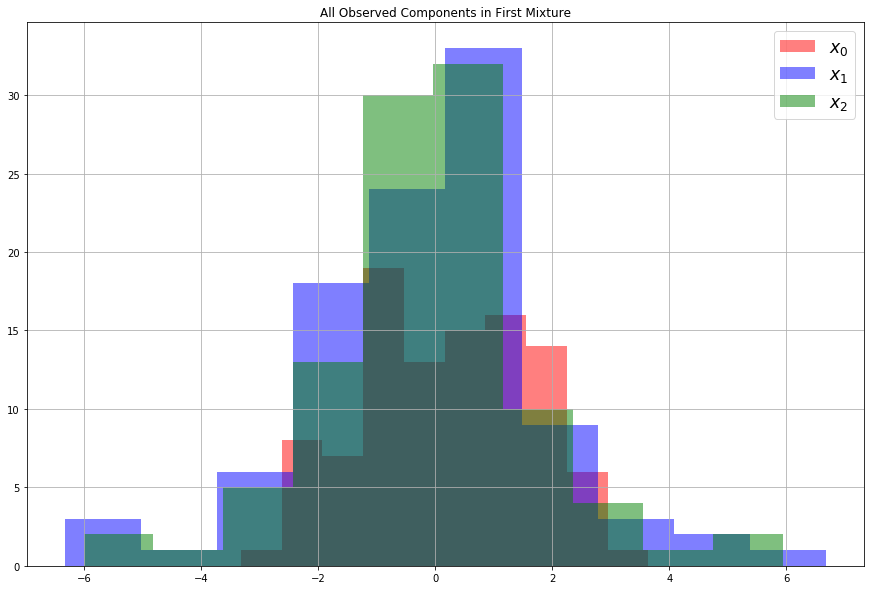

In [6]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100_all_run1.png')
plt.show()

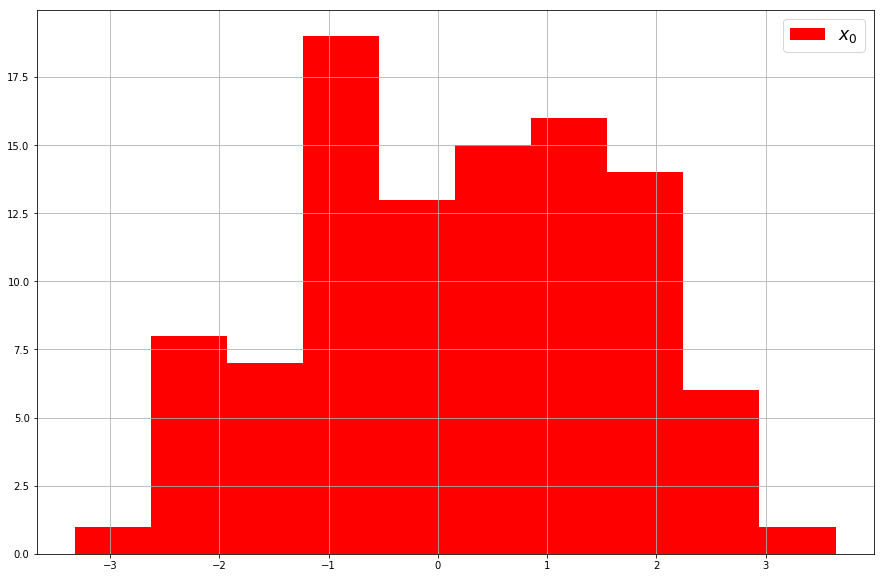

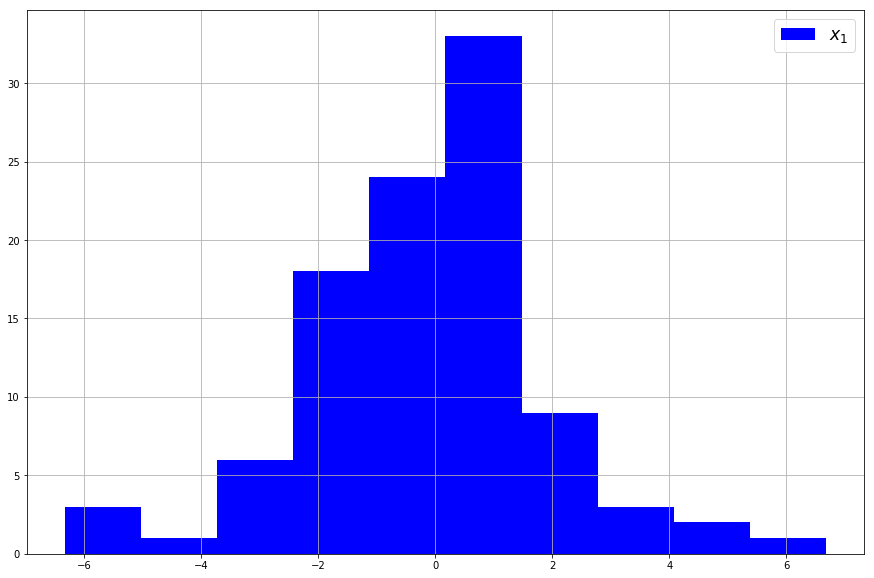

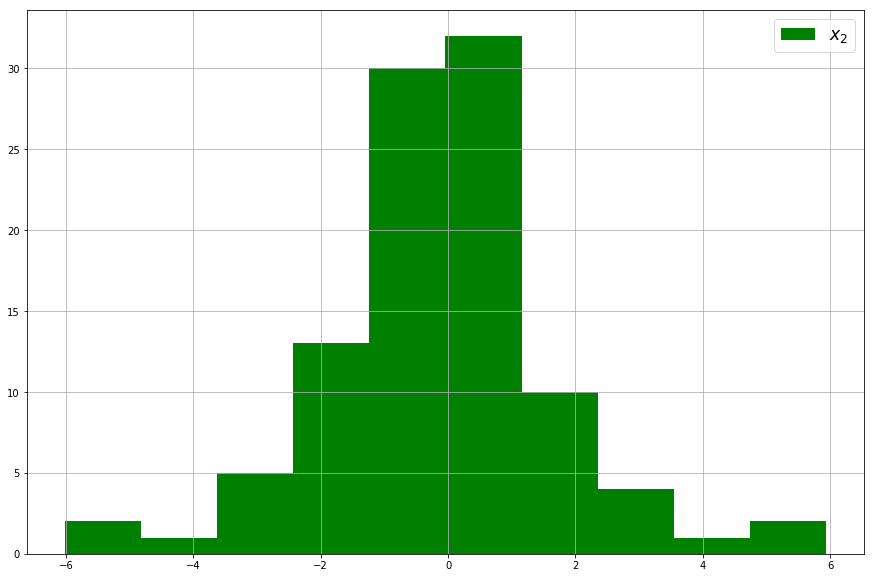

In [7]:

colors = ['r','b','g']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100_component_'+str(i)+'_run1.png')
    plt.show()

In [8]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 6
Time to converges the FastICA: 0.344 seconds


In [ ]:
# Use for time series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,y]#, S, S_, H]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
         #'True Sources',
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

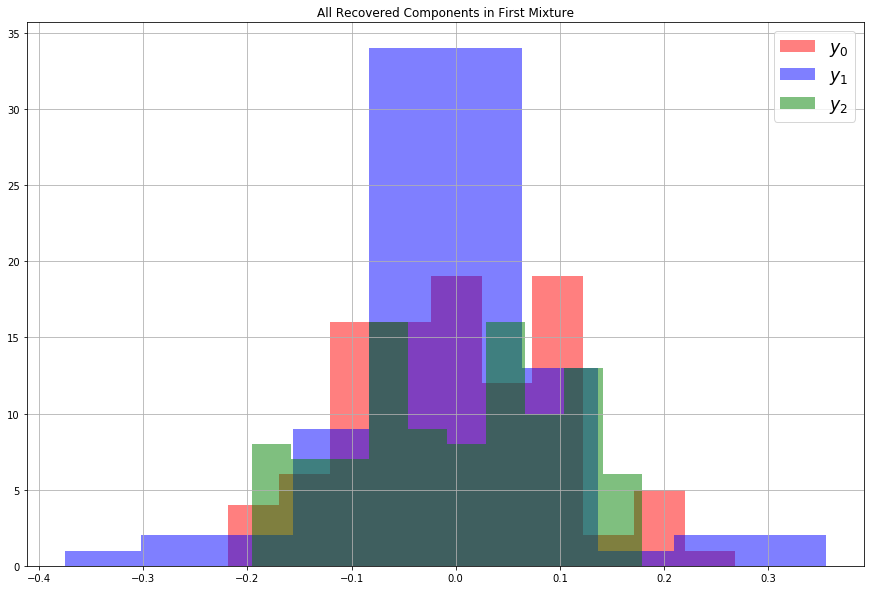

In [9]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100_all_run1.png')
plt.show()

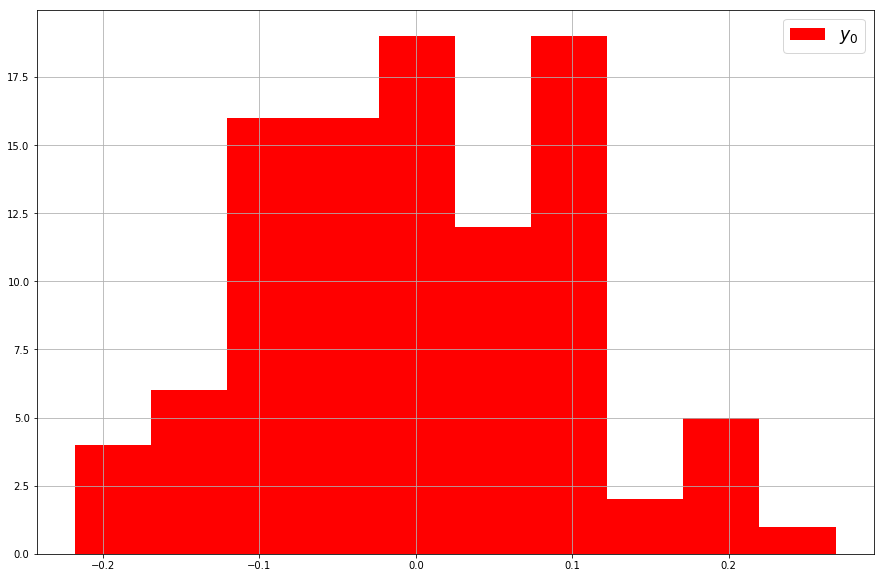

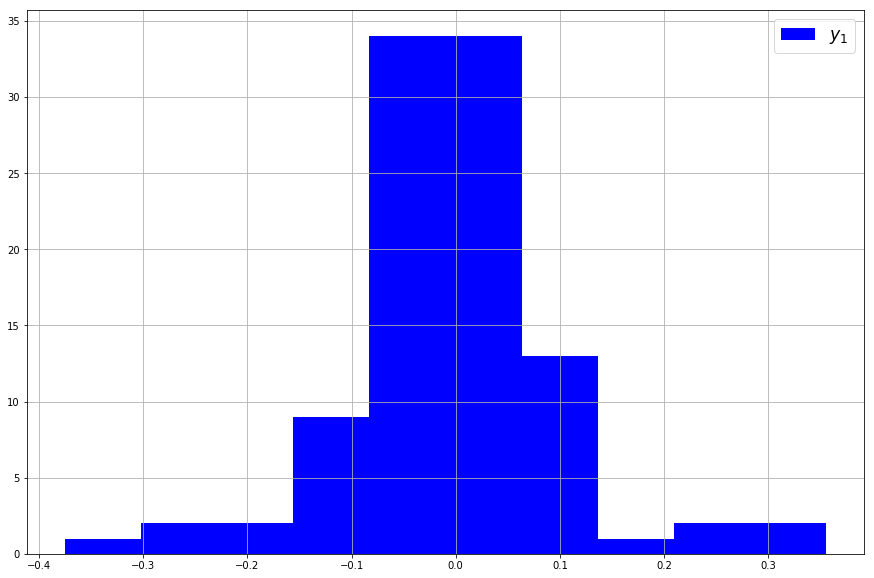

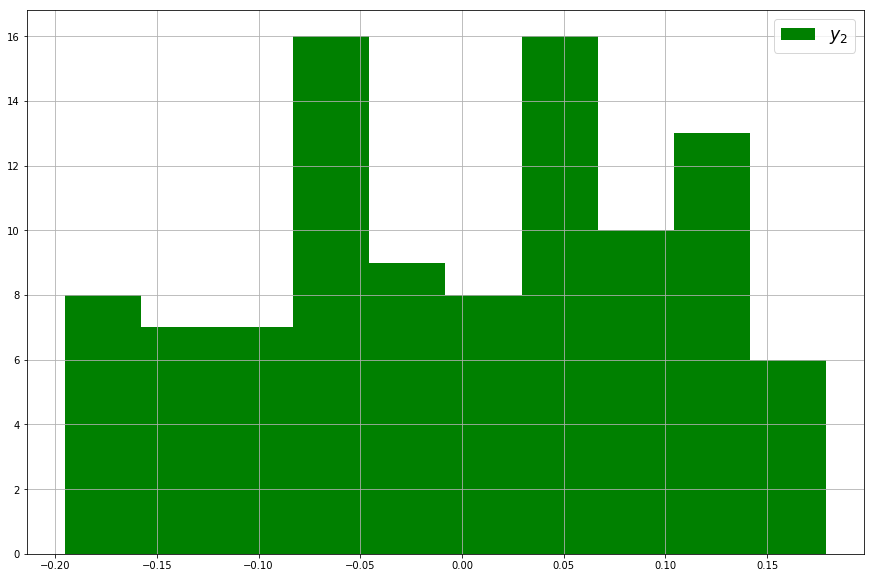

In [10]:

colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA100_component_'+str(i)+'_run1.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


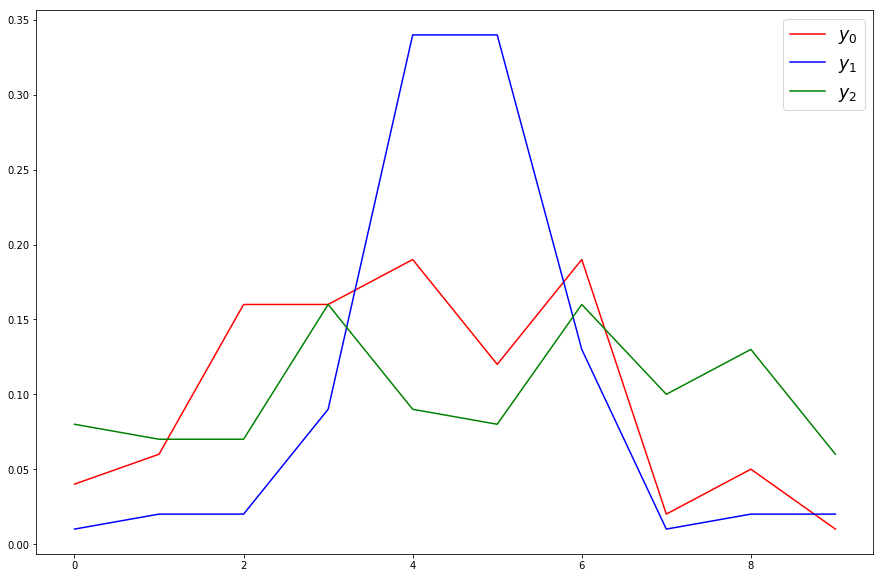

In [11]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100_run1.png')
plt.show()

In [12]:
# normalize the recovered sources 
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [13]:
for i in range(normalized_sources.shape[0]):
    print np.mean(normalized_sources[i,:]),np.std(normalized_sources[i,:])
print normalized_sources.shape

7.77156117238e-18 1.0
-6.24500451352e-19 1.0
-2.22044604925e-18 1.0
(3, 100)


In [14]:
bins = 25

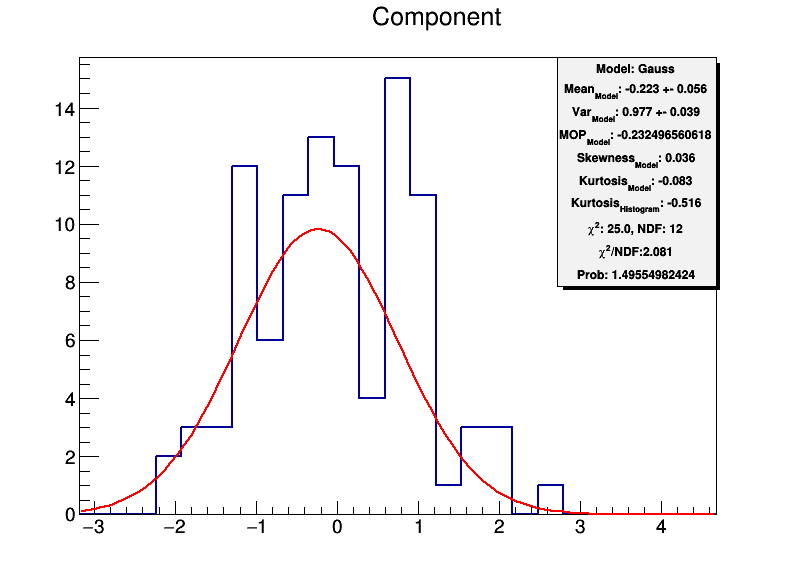

In [15]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("same")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


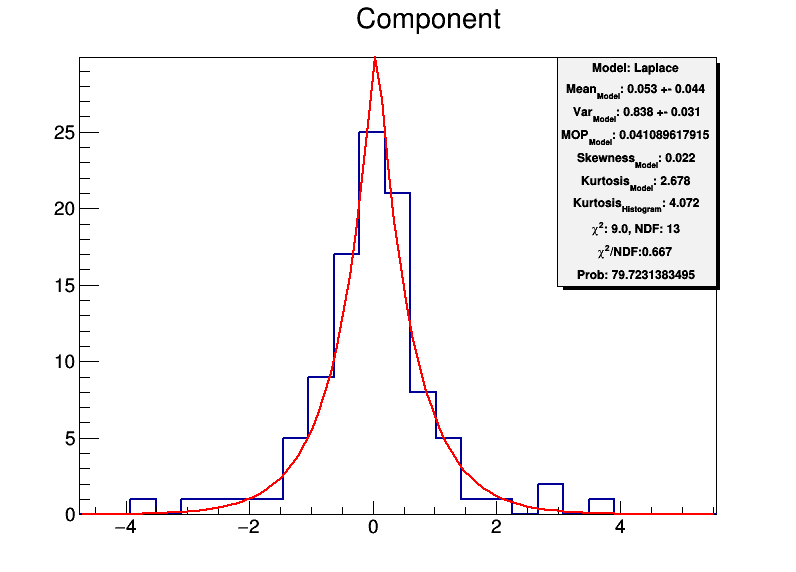

In [16]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='M')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("same")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100_run1.png')
c

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).
Fit:0: RuntimeWarning: Abnormal termination of minimization.


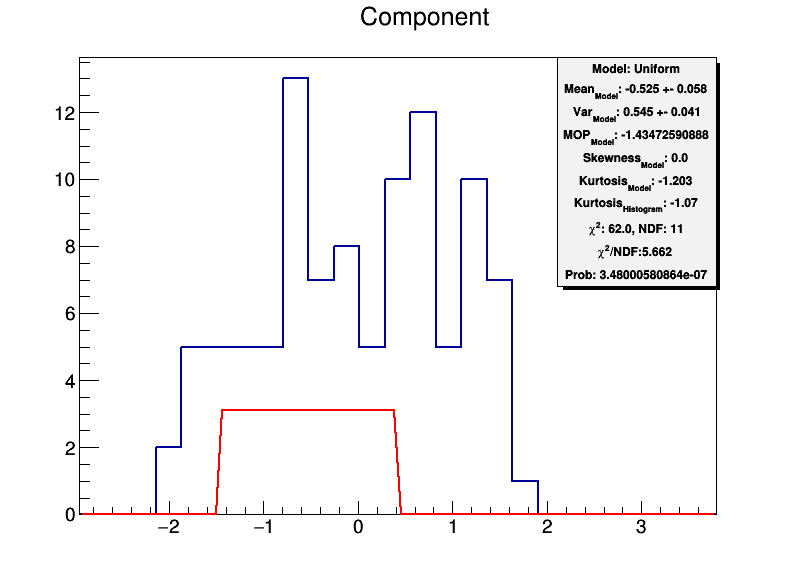

In [31]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:])-1, np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='M')
fit.SetLineColor(kRed)
hist.SetLineWidth(2)
fit.Draw("same")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100_run1.png')
c

# Using 1000 stats

In [32]:
x = np.loadtxt('FirstMixture1000Stats.txt')
x.shape

(3, 1000)

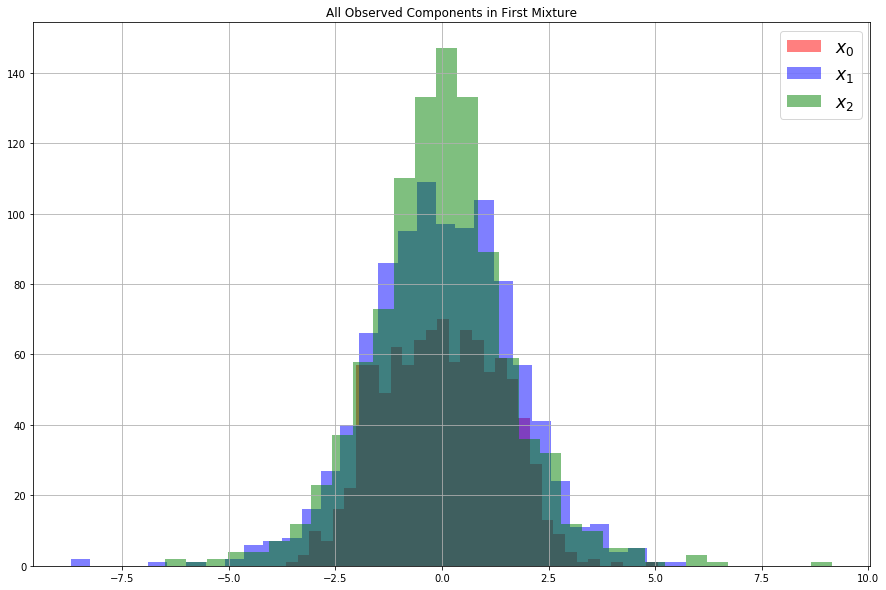

In [33]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture1000_all_run1.png')
plt.show()

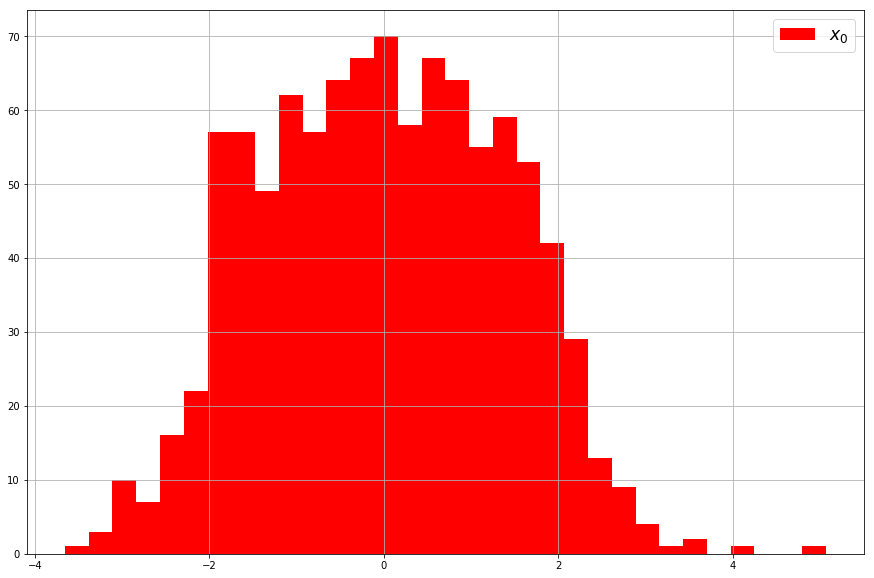

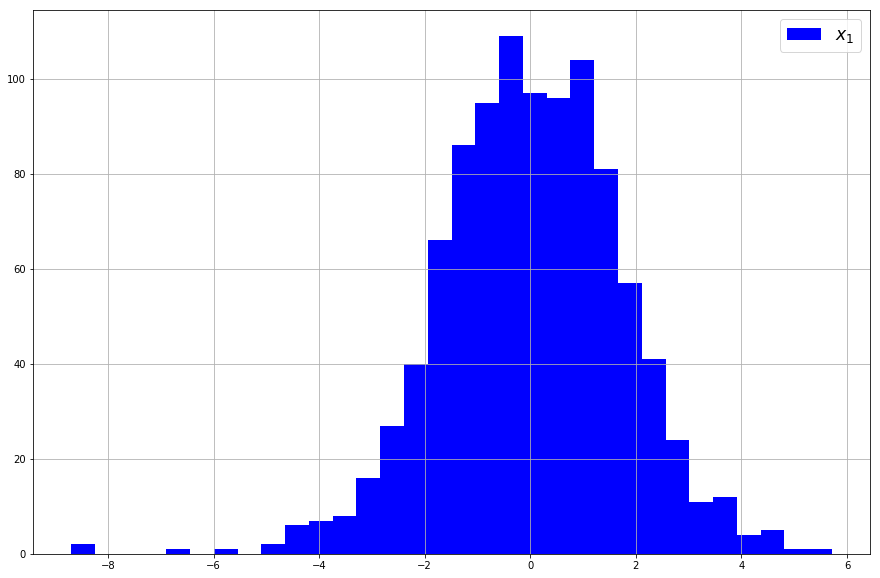

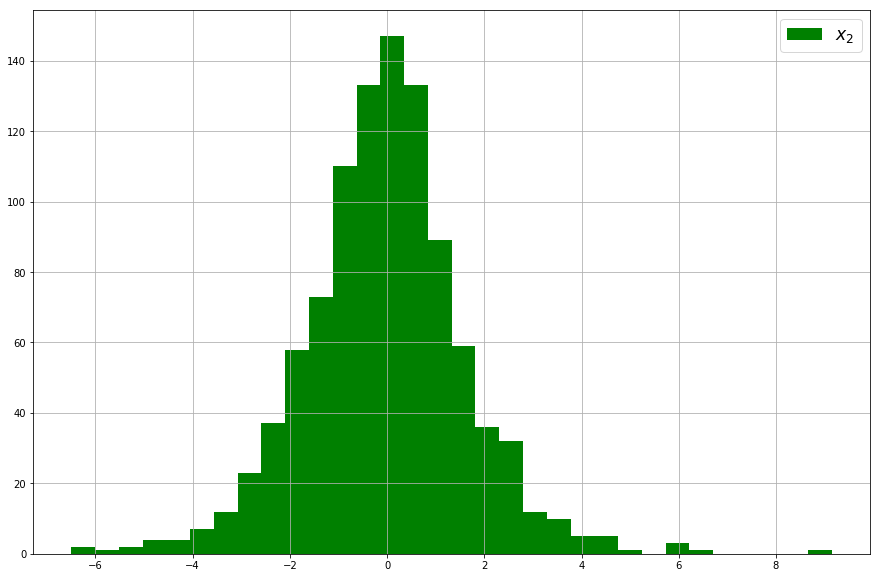

In [34]:

colors = ['r','b','g']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture1000_component_'+str(i)+'_run1.png')
    plt.show()

In [35]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 5
Time to converges the FastICA: 0.007 seconds


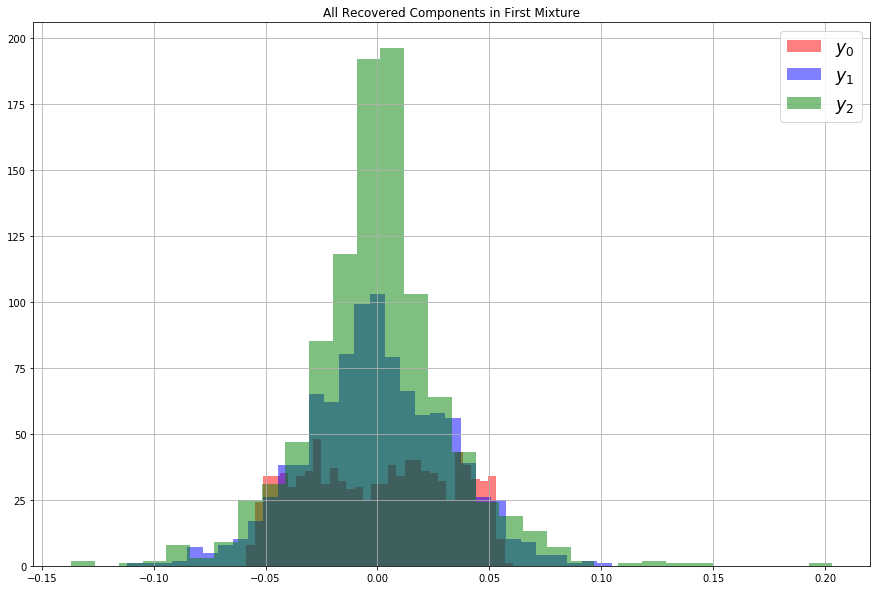

In [36]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA1000_all_run1.png')
plt.show()

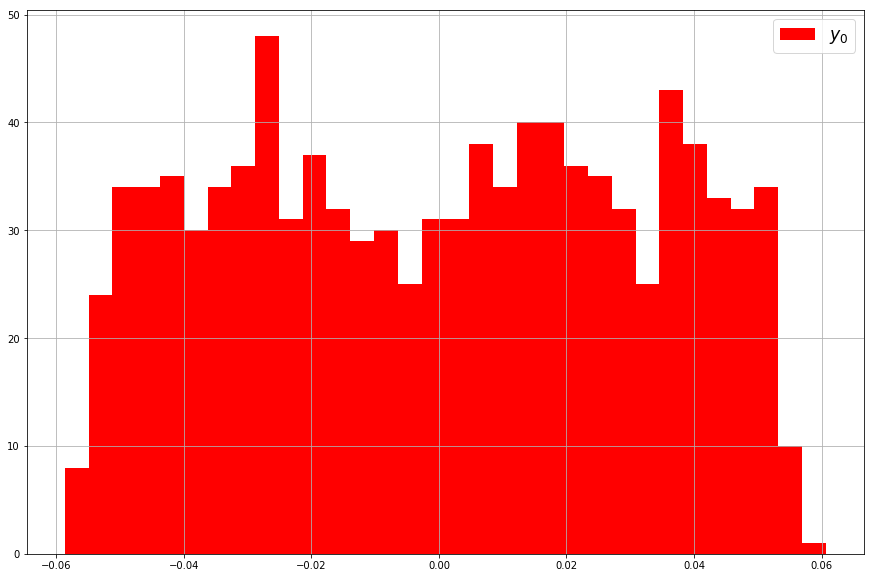

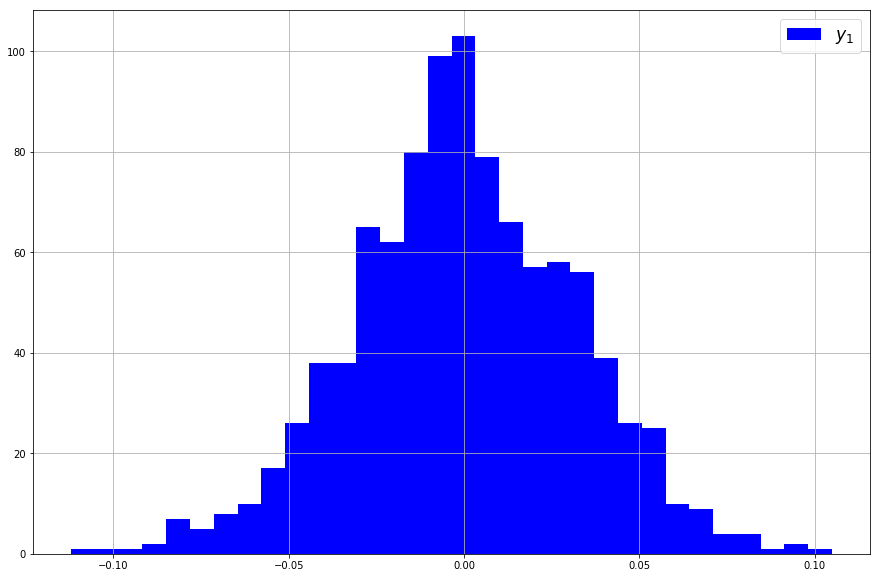

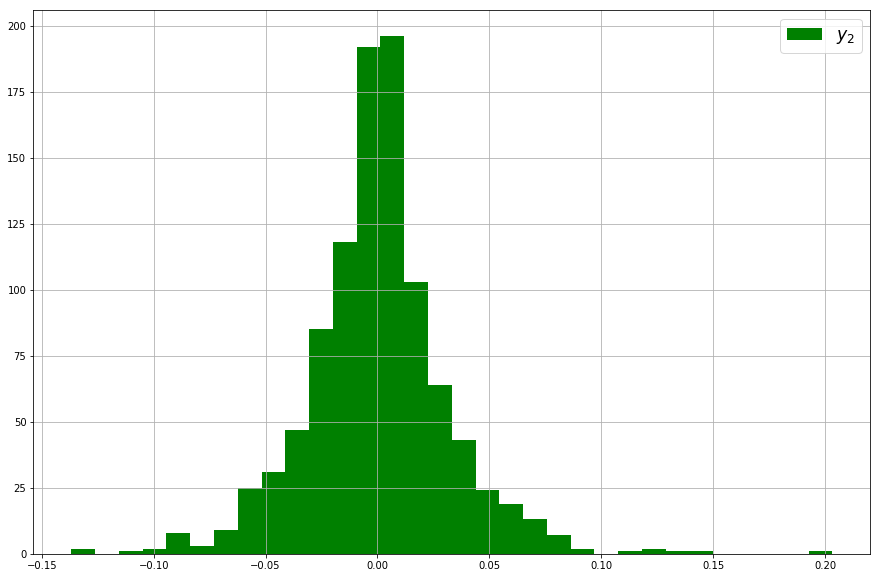

In [37]:

colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA1000_component_'+str(i)+'_run1.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


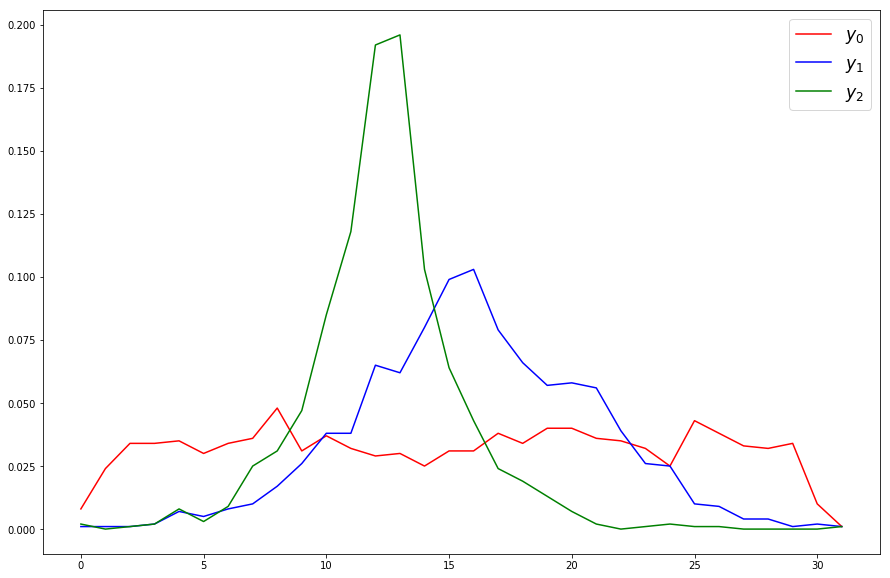

In [38]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA1000_run1.png')
plt.show()

In [39]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [40]:
bins = 100

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).
Fit:0: RuntimeWarning: Abnormal termination of minimization.


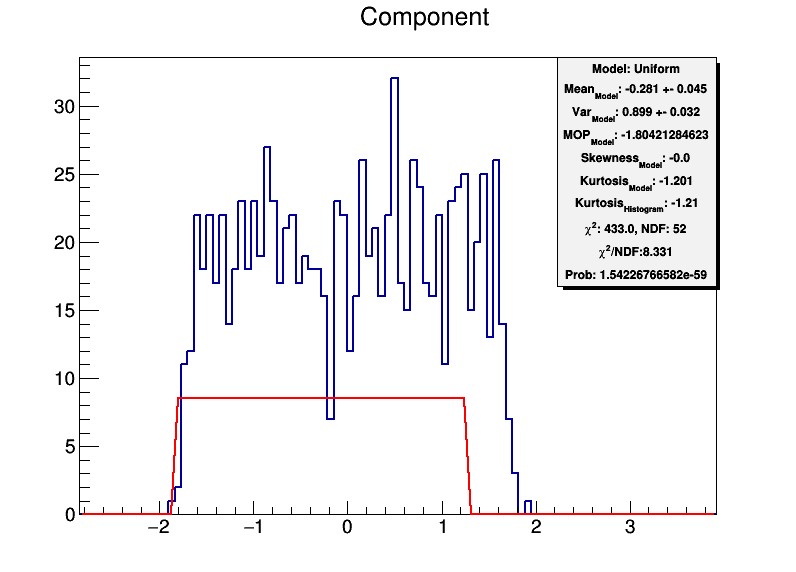

In [41]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_1000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


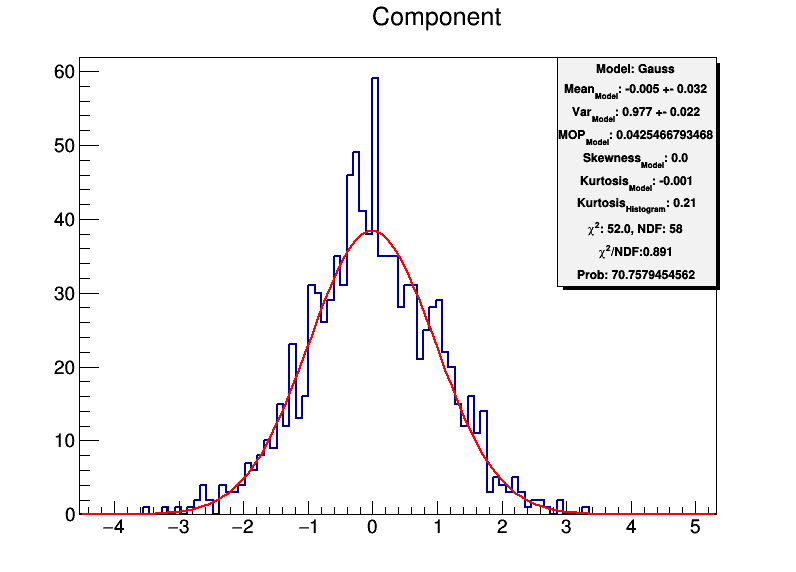

In [42]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_1000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


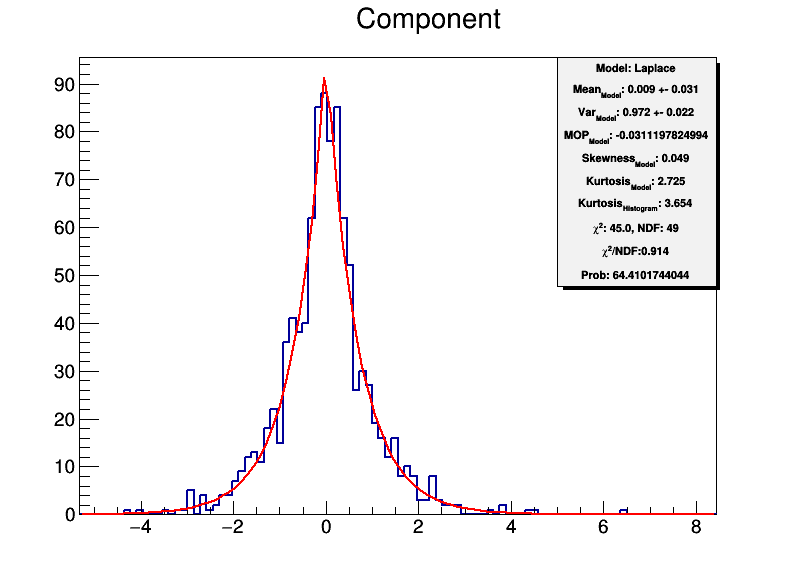

In [43]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:])-1, np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_1000_run1.png')
c


# Using 100K stats

In [44]:
x = np.loadtxt('FirstMixture100000Stats.txt')
x.shape

(3, 100000)

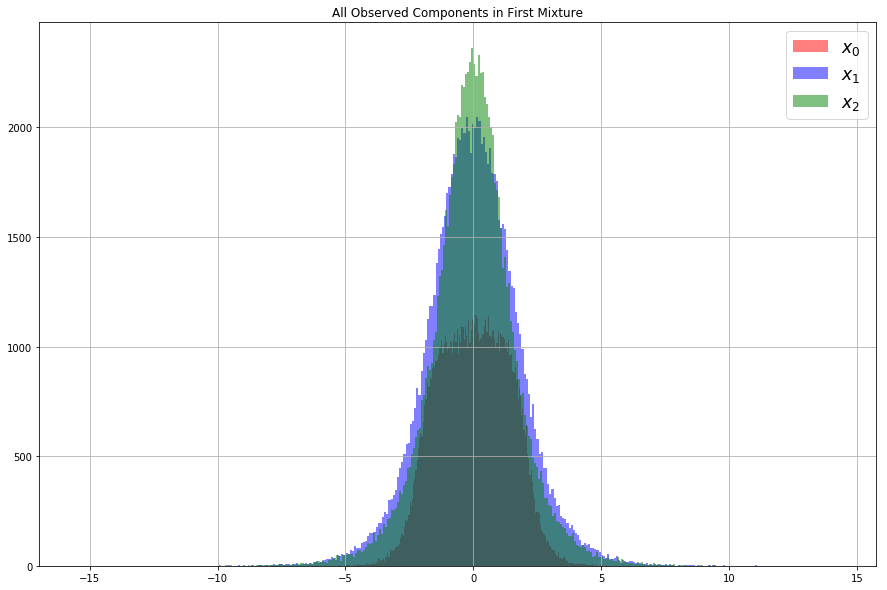

In [45]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100000_all_run1.png')
plt.show()

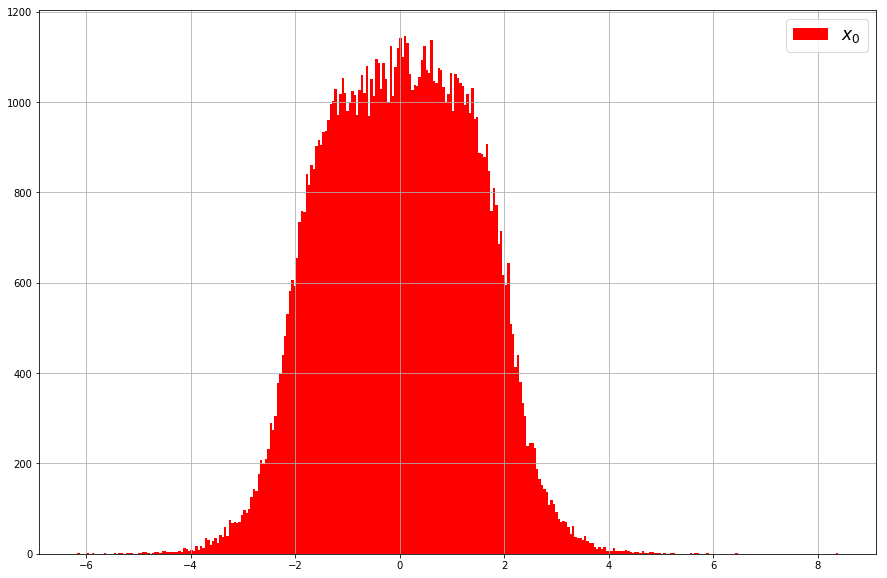

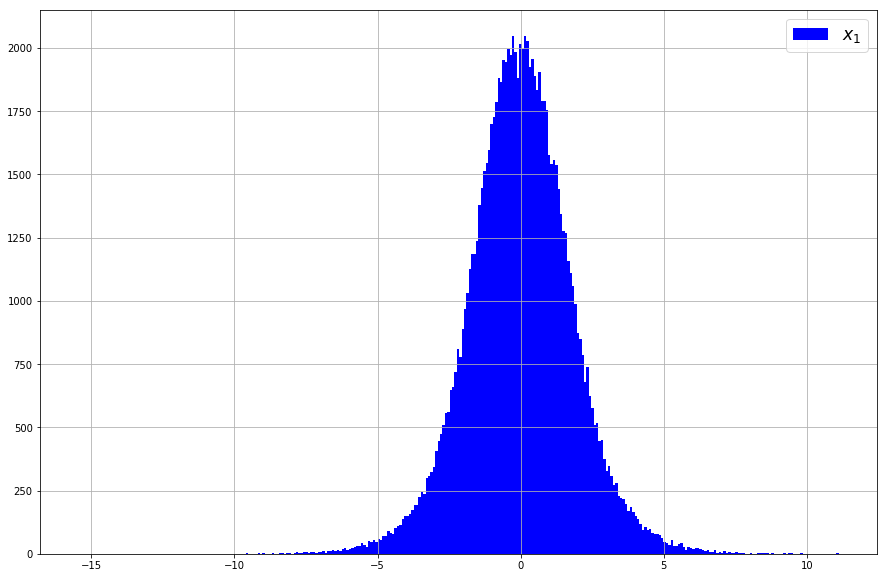

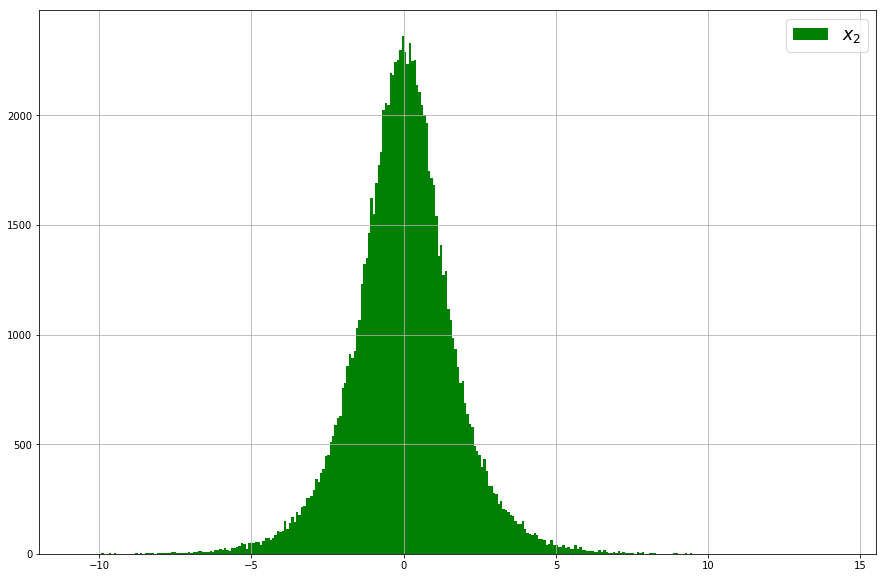

In [46]:

colors = ['r','b','g']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100000_component_'+str(i)+'_run1.png')
    plt.show()

In [47]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 3
Time to converges the FastICA: 0.220 seconds


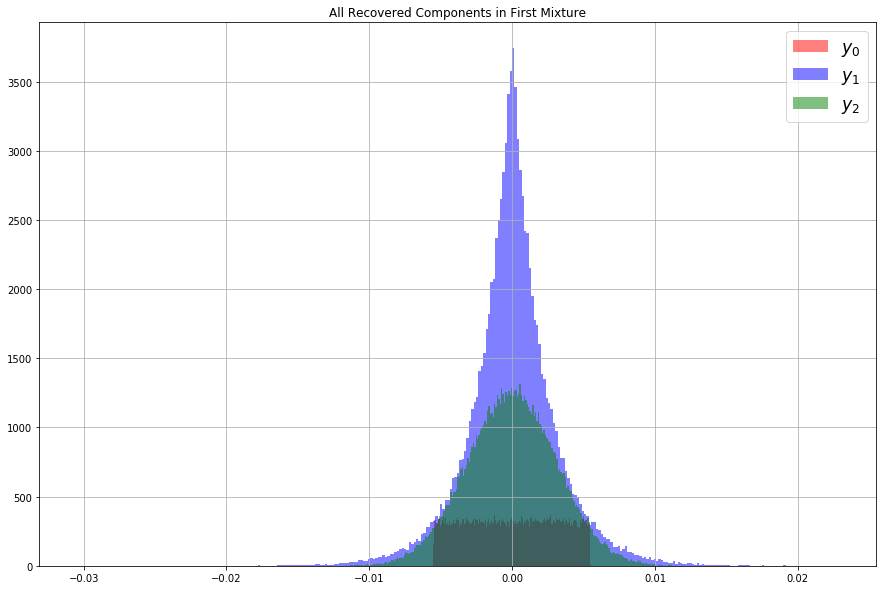

In [48]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in First Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100000_all_run1.png')
plt.show()

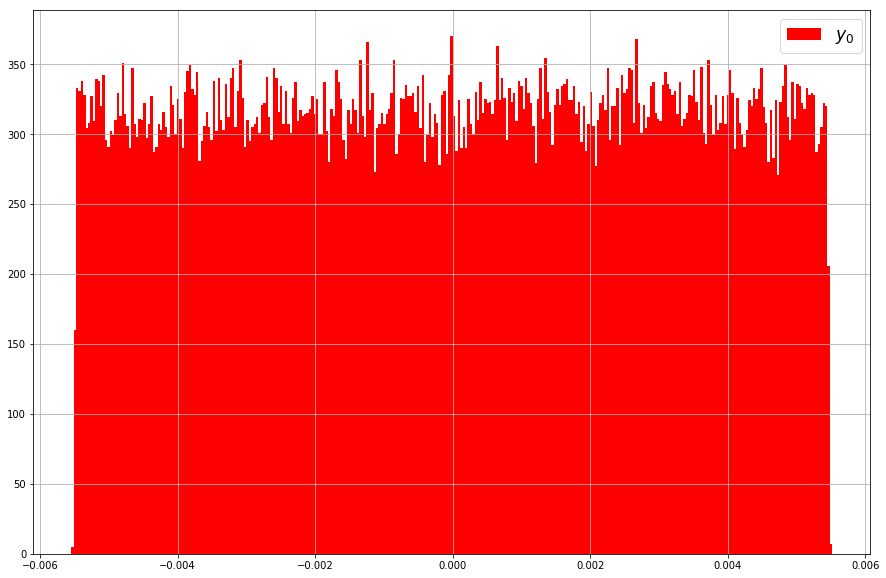

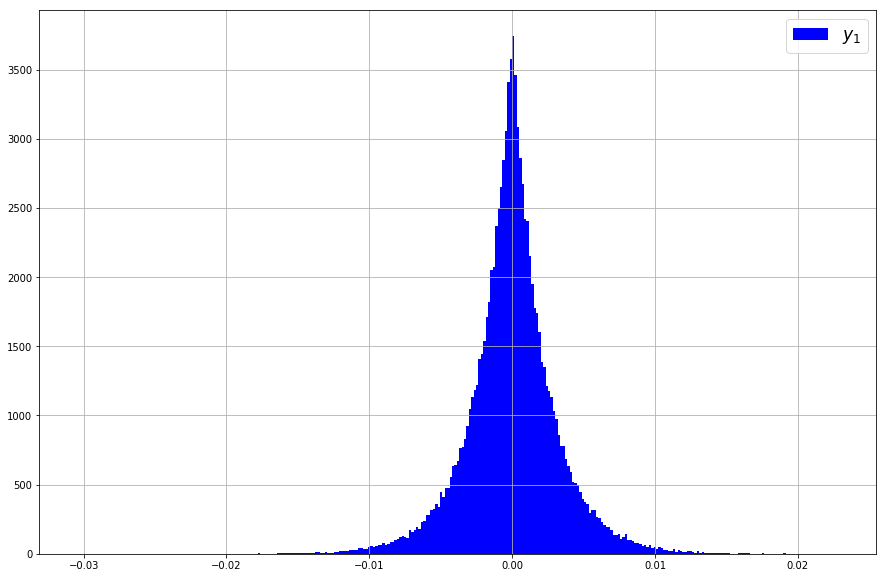

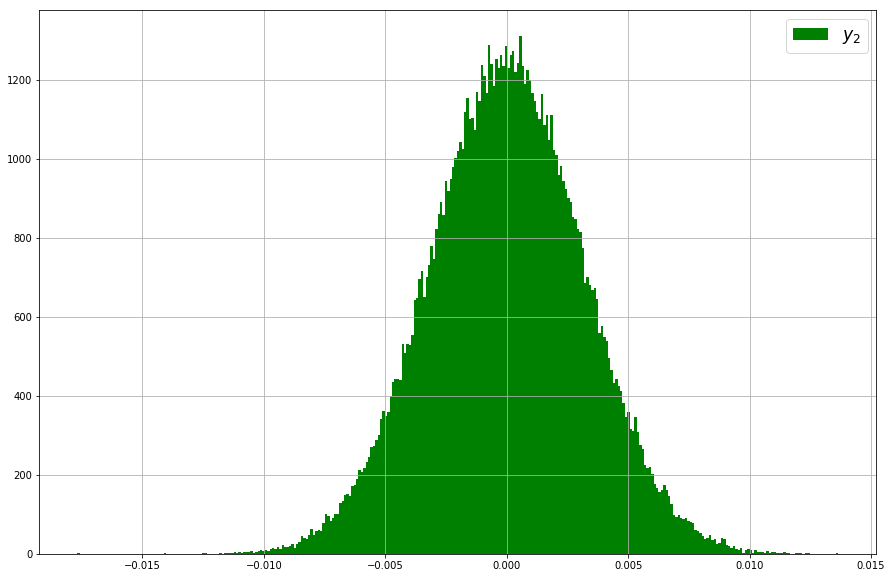

In [49]:

colors = ['r','b','g']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA10000_component_'+str(i)+'_run1.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


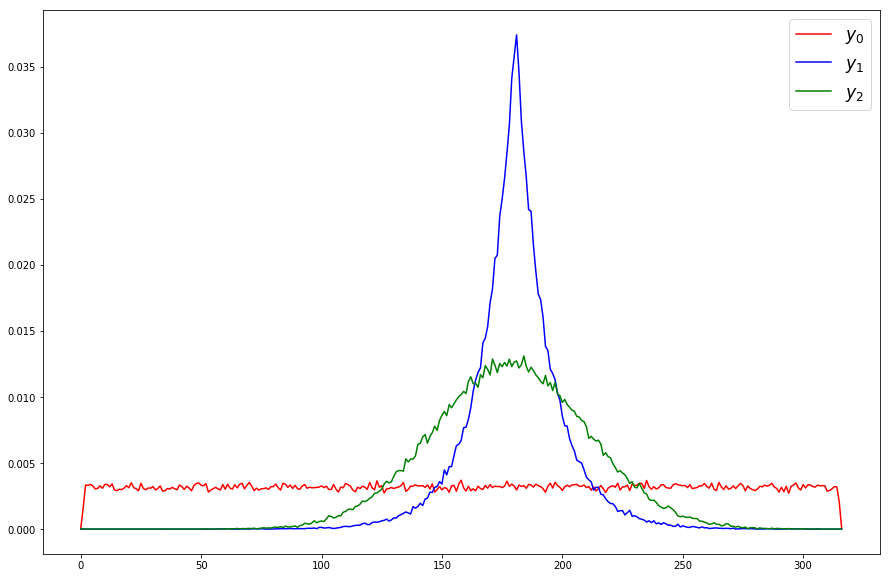

In [50]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100000_run1.png')
plt.show()

In [51]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [52]:
bins = 150

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


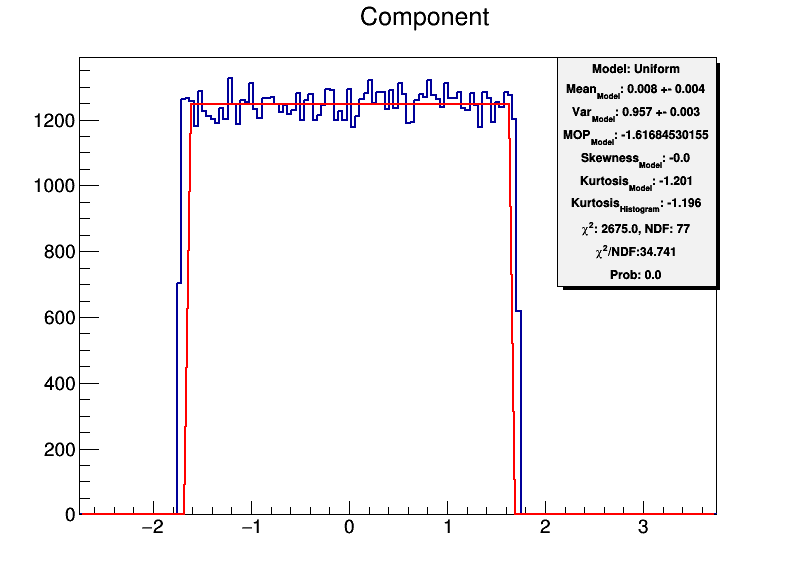

In [53]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitUniform(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("same")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


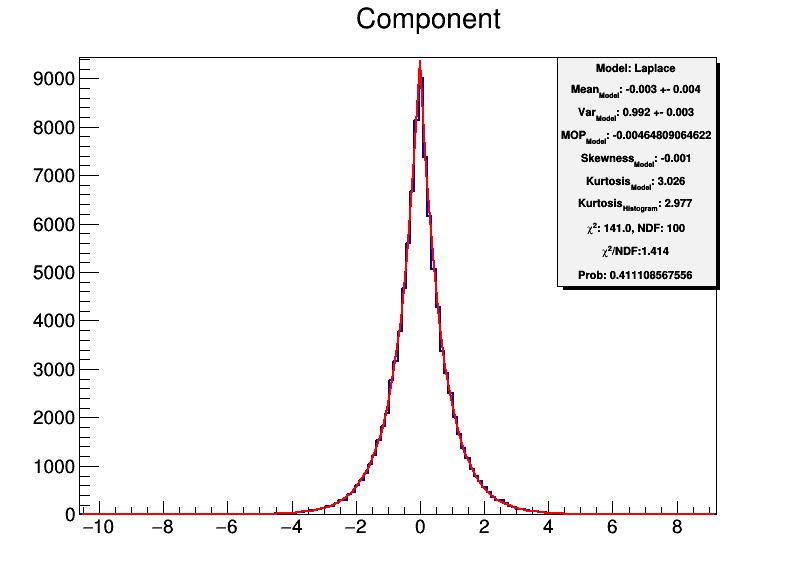

In [54]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100000_run1.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


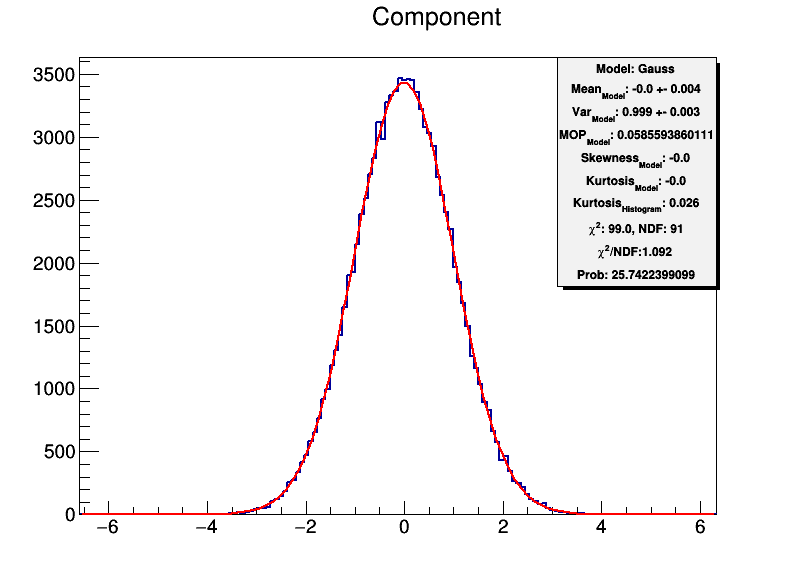

In [55]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:])-1, np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100000_run1.png')
c
